# German Credit Dataset Analysis

In [1]:
import pandas as pd
import numpy as np

## General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence               1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  age_cat                 1000 non-null   object
 14  other_payment_plans     1000 non-null   object
 15  housi

<AxesSubplot:ylabel='class'>

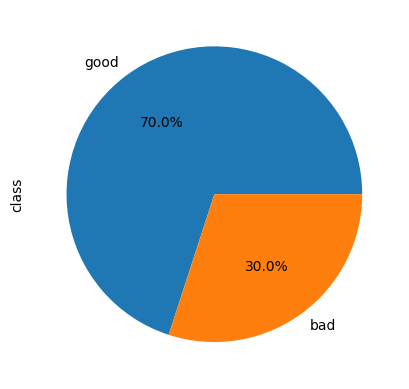

In [2]:
df = pd.read_csv("../Cleaned/German-Credit/german.csv", skipinitialspace=True)
df.info()
print("target count")
print(df['class'].value_counts())
df['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## age_cat

old      810
young    190
Name: age_cat, dtype: int64


<AxesSubplot:ylabel='age_cat'>

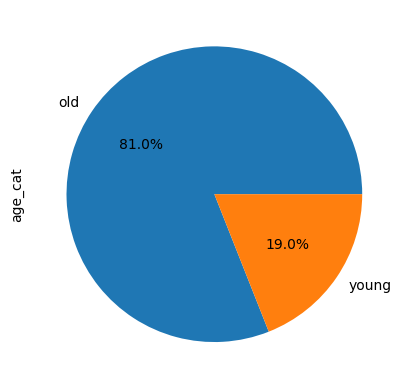

In [4]:
print(df['age_cat'].value_counts())
df['age_cat'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering age_cat = old

good    590
bad     220
Name: class, dtype: int64


<AxesSubplot:ylabel='class'>

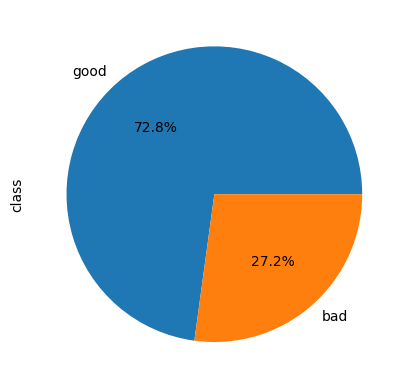

In [5]:
print(df.loc[df['age_cat']=="old"]['class'].value_counts())
df.loc[df['age_cat']=="old"]['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering age_cat = young

good    110
bad      80
Name: class, dtype: int64


<AxesSubplot:ylabel='class'>

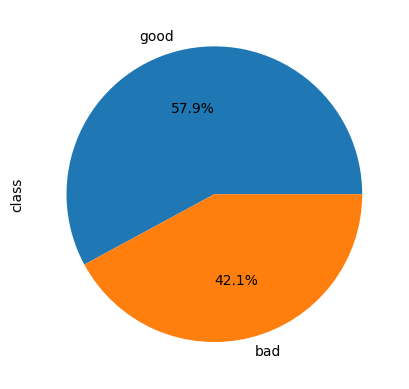

In [6]:
print(df.loc[df['age_cat']=="young"]['class'].value_counts())
df.loc[df['age_cat']=="young"]['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = good

let y- = bad

let s0 = old

let s1 = young

In [7]:
# p(y+|s0) -> p(good|old)
p1 = len(df.loc[(df['age_cat']=="old") & (df['class']=="good")]) / len(df.loc[df['age_cat']=="old"])
#print(p1)
# p(y-|s1) -> p(bad|young)
p2 = len(df.loc[(df['age_cat']=="young") & (df['class']=="bad")]) / len(df.loc[df['age_cat']=="young"])
#print(p2)
# p(y+|s1) -> p(good|young)
p3 = len(df.loc[(df['age_cat']=="young") & (df['class']=="good")]) / len(df.loc[df['age_cat']=="young"])
#print(p3)
# p(y-|s0) -> p(bad|old)
p4 = len(df.loc[(df['age_cat']=="old") & (df['class']=="bad")]) / len(df.loc[df['age_cat']=="old"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.950


In [8]:
#OR for s0 = young
oddsratio = (p3 * p4) / (p1 * p2)
print("OR: {:.3f}".format(oddsratio))

OR: 0.513


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = good

let y- = bad

let s0 = old

let s1 = young

In [10]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.258


### Proxies

Most of the proxies found for age_cat include (a combination of):
 - 

Best model (min depth) found with a node at depth 2 with 106 samples.

	** num_dependents > 1.5 , housing_own > 0.5 ,  #impurity: 0.0, #samples: 106.

Best model (max sample) found with 142 sample in a node at depth 5.

    ** checking_status_no checking > 0.5 , housing_rent <= 0.5 , personal_status_female div/dep/mar <= 0.5 , property_magnitude_car <= 0.5 , purpose_business <= 0.5 ,  #impurity: 0.0, #samples: 142.
    
        

For proxy: num_dependets > 1.5 && housing == own

old    106
Name: age_cat, dtype: int64


<AxesSubplot:ylabel='age_cat'>

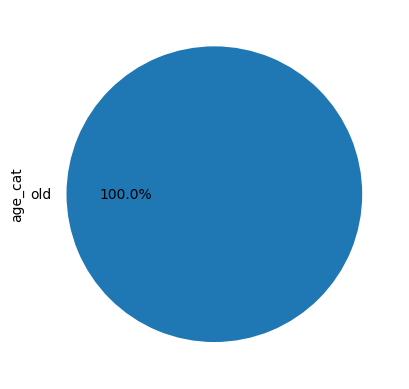

In [11]:
print(df.loc[(df['num_dependents']>1.5) & (df['housing']=="own")]['age_cat'].value_counts())
df.loc[(df['num_dependents']>1.5) & (df['housing']=="own")]['age_cat'].value_counts().plot(kind='pie',autopct='%1.1f%%')

good    82
bad     24
Name: class, dtype: int64


<AxesSubplot:ylabel='class'>

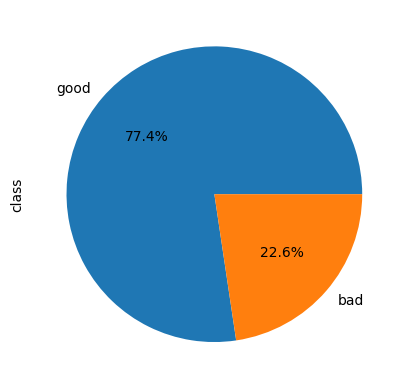

In [12]:
print(df.loc[(df['num_dependents']>1.5) & (df['housing']=="own")]['class'].value_counts())
df.loc[(df['num_dependents']>1.5) & (df['housing']=="own")]['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = good

let y- = bad

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [14]:
# p(y+|s0) -> p(good|Proxy)
p1 = len(df.loc[(df['num_dependents']>1.5) & (df['housing']=="own") & (df['class']=="good")]) / len(df.loc[(df['num_dependents']>1.5) & (df['housing']=="own")])
#print(p1)
# p(y-|s1) -> p(bad|!Proxy)
p2 = len(df.loc[((df['num_dependents']<=1.5) | (df['housing']!="own")) & (df['class']=="bad")]) / len(df.loc[(df['num_dependents']<=1.5) | (df['housing']!="own")])
#print(p2)
# p(y+|s1) -> p(good|!Proxy)
p3 = len(df.loc[((df['num_dependents']<=1.5) | (df['housing']!="own")) & (df['class']=="good")]) / len(df.loc[((df['num_dependents']<=1.5) | (df['housing']!="own"))])
#print(p3)
# p(y-|s0) -> p(bad|Proxy)
p4 = len(df.loc[(df['num_dependents']>1.5) & (df['housing']=="own") & (df['class']=="bad")]) / len(df.loc[(df['num_dependents']>1.5) & (df['housing']=="own")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.526


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = good

let y- = bad

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [15]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.119


For proxy: checking_status == "no checking" & housing != rent & personal_status != "female div/dep/mar" & property_magnitude != car & purpose != business

old    142
Name: age_cat, dtype: int64


<AxesSubplot:ylabel='age_cat'>

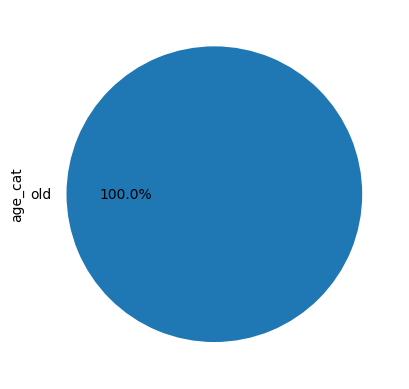

In [16]:
print(df.loc[(df['checking_status']=="no checking") & (df['housing']!="rent") & (df['personal_status']!="female div/dep/mar") & (df['property_magnitude']!="car") & (df['purpose']!="business")]['age_cat'].value_counts())
df.loc[(df['checking_status']=="no checking") & (df['housing']!="rent") & (df['personal_status']!="female div/dep/mar") & (df['property_magnitude']!="car") & (df['purpose']!="business")]['age_cat'].value_counts().plot(kind='pie',autopct='%1.1f%%')

good    132
bad      10
Name: class, dtype: int64


<AxesSubplot:ylabel='class'>

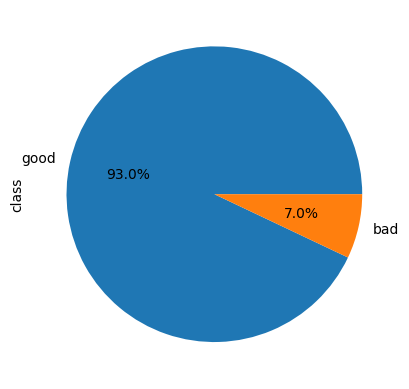

In [17]:
print(df.loc[(df['checking_status']=="no checking") & (df['housing']!="rent") & (df['personal_status']!="female div/dep/mar") & (df['property_magnitude']!="car") & (df['purpose']!="business")]['class'].value_counts())
df.loc[(df['checking_status']=="no checking") & (df['housing']!="rent") & (df['personal_status']!="female div/dep/mar") & (df['property_magnitude']!="car") & (df['purpose']!="business")]['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = good

let y- = bad

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [18]:
# df.loc[(df['checking_status']=="no checking") & (df['housing']!="rent") & (df['personal_status']!="female div/dep/mar") & (df['property_magnitude']!="car") & (df['purpose']!="business")]
# p(y+|s0) -> p(good|Proxy)
p1 = len(df.loc[(df['checking_status']=="no checking") & (df['housing']!="rent") & (df['personal_status']!="female div/dep/mar") & (df['property_magnitude']!="car") & (df['purpose']!="business") & (df['class']=="good")]) / len(df.loc[(df['checking_status']=="no checking") & (df['housing']!="rent") & (df['personal_status']!="female div/dep/mar") & (df['property_magnitude']!="car") & (df['purpose']!="business")])
#print(p1)
# p(y-|s1) -> p(bad|!Proxy)
p2 = len(df.loc[((df['checking_status']!="no checking") | (df['housing']=="rent") | (df['personal_status']=="female div/dep/mar") | (df['property_magnitude']=="car") | (df['purpose']=="business")) & (df['class']=="bad")]) / len(df.loc[(df['checking_status']!="no checking") | (df['housing']=="rent") | (df['personal_status']=="female div/dep/mar") | (df['property_magnitude']=="car") | (df['purpose']=="business")])
#print(p2)
# p(y+|s1) -> p(good|!Proxy)
p3 = len(df.loc[((df['checking_status']!="no checking") | (df['housing']=="rent") | (df['personal_status']=="female div/dep/mar") | (df['property_magnitude']=="car") | (df['purpose']=="business")) & (df['class']=="good")]) / len(df.loc[(df['checking_status']!="no checking") | (df['housing']=="rent") | (df['personal_status']=="female div/dep/mar") | (df['property_magnitude']=="car") | (df['purpose']=="business")])
#print(p3)
# p(y-|s0) -> p(bad|Proxy)
p4 = len(df.loc[(df['checking_status']=="no checking") & (df['housing']!="rent") & (df['personal_status']!="female div/dep/mar") & (df['property_magnitude']!="car") & (df['purpose']!="business") & (df['class']=="bad")]) / len(df.loc[(df['checking_status']=="no checking") & (df['housing']!="rent") & (df['personal_status']!="female div/dep/mar") & (df['property_magnitude']!="car") & (df['purpose']!="business")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 6.739


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = good

let y- = bad

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [19]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.404


## foreign_worker

yes    963
no      37
Name: foreign_worker, dtype: int64


<AxesSubplot:ylabel='foreign_worker'>

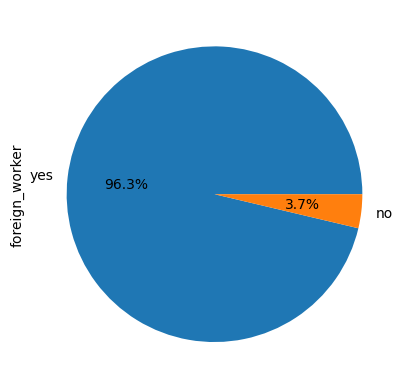

In [20]:
print(df['foreign_worker'].value_counts())
df['foreign_worker'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering foreign_worker = yes

good    667
bad     296
Name: class, dtype: int64


<AxesSubplot:ylabel='class'>

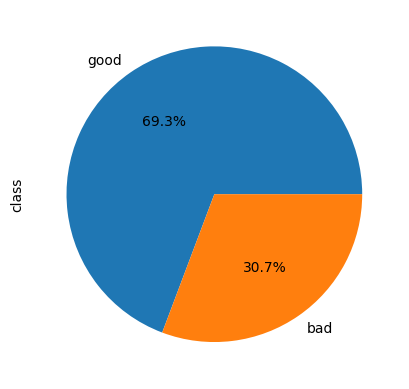

In [21]:
print(df.loc[df['foreign_worker']=="yes"]['class'].value_counts())
df.loc[df['foreign_worker']=="yes"]['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering foreign_worker = no

good    33
bad      4
Name: class, dtype: int64


<AxesSubplot:ylabel='class'>

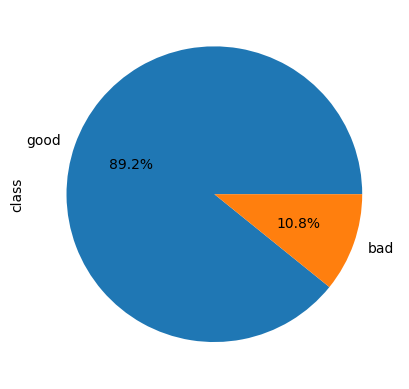

In [22]:
print(df.loc[df['foreign_worker']=="no"]['class'].value_counts())
df.loc[df['foreign_worker']=="no"]['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = good

let y- = bad

let s0 = yes

let s1 = no

In [23]:
# p(y+|s0) -> p(good|yes)
p1 = len(df.loc[(df['foreign_worker']=="yes") & (df['class']=="good")]) / len(df.loc[df['foreign_worker']=="yes"])
#print(p1)
# p(y-|s1) -> p(bad|no)
p2 = len(df.loc[(df['foreign_worker']!="yes") & (df['class']=="bad")]) / len(df.loc[df['foreign_worker']!="yes"])
#print(p2)
# p(y+|s1) -> p(good|no)
p3 = len(df.loc[(df['foreign_worker']!="yes") & (df['class']=="good")]) / len(df.loc[df['foreign_worker']!="yes"])
#print(p3)
# p(y-|s0) -> p(bad|yes)
p4 = len(df.loc[(df['foreign_worker']=="yes") & (df['class']=="bad")]) / len(df.loc[df['foreign_worker']=="yes"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.273


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = good

let y- = bad

let s0 = yes

let s1 = no

In [24]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.777


### Proxies

Most of the proxies found for foreign_worker include (a combination of):
 - 


Best model (min depth) found with a node at depth 1 with 108 samples.

	** housing_for free > 0.5 ,  #impurity: 0.0, #samples: 108.

Best model (max sample) found with 559 sample in a node at depth 5.

    ** installment_commitment > 1.5 , other_parties_co applicant <= 0.5 , purpose_new car <= 0.5 , other_parties_none > 0.5 , personal_status_male mar/wid <= 0.5 ,  #impurity: 0.007130033506037137, #samples: 559.

Others:

    ** installment_commitment > 1.5 , other_parties_co applicant <= 0.5 , purpose_new car <= 0.5 , other_parties_none > 0.5 , personal_status_male mar/wid <= 0.5 , employment_4<=X<7 <= 0.5 ,  #impurity: 0.0, #samples: 457.

    


For proxy: housing == "for free"

yes    108
Name: foreign_worker, dtype: int64


<AxesSubplot:ylabel='foreign_worker'>

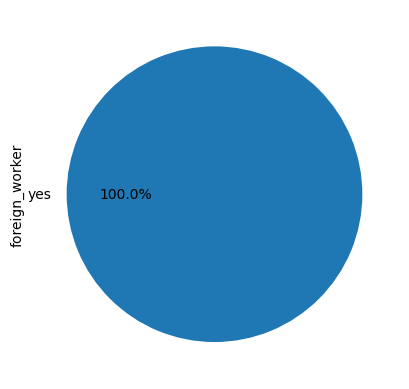

In [25]:
print(df.loc[(df['housing']=="for free")]['foreign_worker'].value_counts())
df.loc[(df['housing']=="for free")]['foreign_worker'].value_counts().plot(kind='pie',autopct='%1.1f%%')

good    64
bad     44
Name: class, dtype: int64


<AxesSubplot:ylabel='class'>

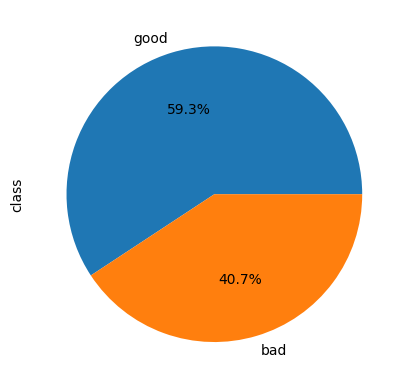

In [26]:
print(df.loc[(df['housing']=="for free")]['class'].value_counts())
df.loc[(df['housing']=="for free")]['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = good

let y- = bad

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [29]:
# p(y+|s0) -> p(good|Proxy)
p1 = len(df.loc[(df['housing']=="for free") & (df['class']=="good")]) / len(df.loc[(df['housing']=="for free")])
#print(p1)
# p(y-|s1) -> p(bad|!Proxy)
p2 = len(df.loc[(df['housing']!="for free") & (df['class']=="bad")]) / len(df.loc[(df['housing']!="for free")])
#print(p2)
# p(y+|s1) -> p(good|!Proxy)
p3 = len(df.loc[(df['housing']!="for free") & (df['class']=="good")]) / len(df.loc[(df['housing']!="for free")])
#print(p3)
# p(y-|s0) -> p(bad|Proxy)
p4 = len(df.loc[(df['housing']=="for free") & (df['class']=="bad")]) / len(df.loc[(df['housing']=="for free")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.585


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = good

let y- = bad

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [30]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.831


For proxy: installment_commitment > 1.5 & purpose != "new car" & other_parties == none & personal_status != "male mar/wid"

yes    557
no       2
Name: foreign_worker, dtype: int64


<AxesSubplot:ylabel='foreign_worker'>

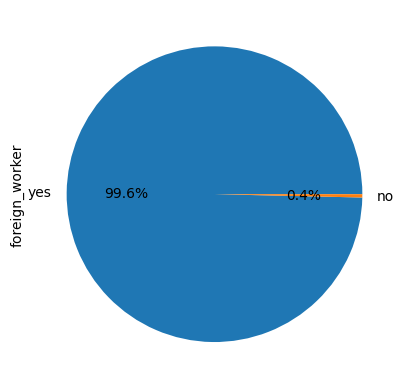

In [34]:
print(df.loc[(df['installment_commitment']>1.5) & (df['purpose']!="new car") & (df['other_parties']=="none") & (df['personal_status']!="male mar/wid")]['foreign_worker'].value_counts())
df.loc[(df['installment_commitment']>1.5) & (df['purpose']!="new car") & (df['other_parties']=="none") & (df['personal_status']!="male mar/wid")]['foreign_worker'].value_counts().plot(kind='pie',autopct='%1.1f%%')

good    399
bad     160
Name: class, dtype: int64


<AxesSubplot:ylabel='class'>

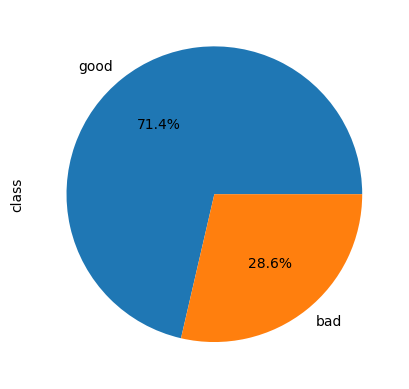

In [35]:
print(df.loc[(df['installment_commitment']>1.5) & (df['purpose']!="new car") & (df['other_parties']=="none") & (df['personal_status']!="male mar/wid")]['class'].value_counts())
df.loc[(df['installment_commitment']>1.5) & (df['purpose']!="new car") & (df['other_parties']=="none") & (df['personal_status']!="male mar/wid")]['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = good

let y- = bad

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [36]:
# (df['installment_commitment']>1.5) & (df['purpose']!="new car") & (df['other_parties']=="none") & (df['personal_status']!="male mar/wid")
# p(y+|s0) -> p(good|Proxy)
p1 = len(df.loc[(df['installment_commitment']>1.5) & (df['purpose']!="new car") & (df['other_parties']=="none") & (df['personal_status']!="male mar/wid") & (df['class']=="good")]) / len(df.loc[(df['installment_commitment']>1.5) & (df['purpose']!="new car") & (df['other_parties']=="none") & (df['personal_status']!="male mar/wid")])
#print(p1)
# p(y-|s1) -> p(bad|!Proxy)
p2 = len(df.loc[((df['installment_commitment']<=1.5) | (df['purpose']=="new car") | (df['other_parties']!="none") | (df['personal_status']=="male mar/wid")) & (df['class']=="bad")]) / len(df.loc[(df['installment_commitment']<=1.5) | (df['purpose']=="new car") | (df['other_parties']!="none") | (df['personal_status']=="male mar/wid")])
#print(p2)
# p(y+|s1) -> p(good|!Proxy)
p3 = len(df.loc[((df['installment_commitment']<=1.5) | (df['purpose']=="new car") | (df['other_parties']!="none") | (df['personal_status']=="male mar/wid")) & (df['class']=="good")]) / len(df.loc[(df['installment_commitment']<=1.5) | (df['purpose']=="new car") | (df['other_parties']!="none") | (df['personal_status']=="male mar/wid")])
#print(p3)
# p(y-|s0) -> p(bad|Proxy)
p4 = len(df.loc[(df['installment_commitment']>1.5) & (df['purpose']!="new car") & (df['other_parties']=="none") & (df['personal_status']!="male mar/wid") & (df['class']=="bad")]) / len(df.loc[(df['installment_commitment']>1.5) & (df['purpose']!="new car") & (df['other_parties']=="none") & (df['personal_status']!="male mar/wid")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.160


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = good

let y- = bad

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [37]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.046
